In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, welch
import tkinter as tk
import threading
import time

---------------------------
CONFIGURACIÓN
---------------------------

In [109]:
CSV_PATH = "../datos/eeg_simulado_alto_alpha.csv"
CSV_PATH_SINT = "../datos/eeg_simulado.csv" 
FS = 250  # Frecuencia de muestreo (Hz)
ALPHA_BAND = (8, 12)
THRESHOLD = 0.5  # Umbral de potencia Alpha (ajustable)

---------------------------
FILTRO PASA BANDA
---------------------------

In [110]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    return b, a

In [111]:
def apply_bandpass(data, lowcut, highcut, fs):
    b, a = butter_bandpass(lowcut, highcut, fs)
    return lfilter(b, a, data)

---------------------------
CARGAR Y PROCESAR DATOS
---------------------------

In [112]:
def load_eeg_data(csv_path):
    df = pd.read_csv(csv_path)
    signal = df.iloc[:, 0].values  # Primera columna como EEG
    return signal

In [113]:
def compute_alpha_power(signal, fs):
    f, pxx = welch(signal, fs=fs, nperseg=1024)
    # Potencia en banda Alpha
    alpha_mask = (f >= ALPHA_BAND[0]) & (f <= ALPHA_BAND[1])
    alpha_power = np.mean(pxx[alpha_mask])
    return alpha_power

---------------------------
VISUALIZACIÓN
---------------------------

In [114]:
def plot_signal(time, signal, title="EEG Signal"):
    plt.figure(figsize=(10, 3))
    plt.plot(time, signal, label="EEG")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(title)
    plt.grid()
    plt.tight_layout()
    plt.show()

---------------------------
SIMULACIÓN VISUAL CON TKINTER
---------------------------

In [115]:
def visual_feedback(alpha_power, threshold):
    color = "green" if alpha_power > threshold else "red"

    root = tk.Tk()
    root.title("BCI Simulada")
    root.geometry("300x300")
    canvas = tk.Canvas(root, width=300, height=300, bg=color)
    canvas.pack()

    label = tk.Label(root, text=f"Alpha Power: {alpha_power:.3f}", font=("Arial", 14))
    label.pack(pady=10)

    root.mainloop()

---------------------------
EJECUCIÓN PRINCIPAL
---------------------------

In [116]:
def main():
    eeg = load_eeg_data(CSV_PATH)  
    time_axis = np.linspace(0, len(eeg) / FS, len(eeg))

    # Visualiza señal original
    plot_signal(time_axis, eeg, title="Señal EEG Original")

    # Filtrado en banda Alpha
    eeg_alpha = apply_bandpass(eeg, ALPHA_BAND[0], ALPHA_BAND[1], FS)
    plot_signal(time_axis, eeg_alpha, title="Señal Filtrada en Banda Alpha")

    # Cálculo de potencia Alpha
    alpha_power = compute_alpha_power(eeg_alpha, FS)
    print(f"Potencia Alpha estimada: {alpha_power:.3f}")

    # Mostrar ventana visual según umbral
    visual_feedback(alpha_power, THRESHOLD)

---------------------------
DATOS
---------------------------

In [117]:
import numpy as np
import pandas as pd

fs = 250
t = np.linspace(0, 10, fs * 10)
# Señal simulada: ruido + onda alpha
signal = 0.5 * np.random.randn(len(t)) + np.sin(2 * np.pi * 10 * t)

df = pd.DataFrame({'eeg': signal})
df.to_csv("../datos/eeg_simulado.csv", index=False)


In [118]:
import numpy as np
import pandas as pd

# Configuración
fs = 250  # frecuencia de muestreo
duration = 10  # segundos
t = np.linspace(0, duration, fs * duration)

# Señal con MUY ALTA energía en banda Alpha (onda senoidal 10 Hz)
alpha_wave = 3.0 * np.sin(2 * np.pi * 10 * t)  # Aumentamos amplitud
noise = 0.1 * np.random.randn(len(t))          # Reducimos el ruido

signal = alpha_wave + noise

# Guardar
df = pd.DataFrame({'eeg': signal})
df.to_csv("../datos/eeg_simulado_alto_alpha.csv", index=False)

print("✅ Archivo generado. Esta vez debe activar la condición (verde).")


✅ Archivo generado. Esta vez debe activar la condición (verde).


---------------------------
INICIO
---------------------------

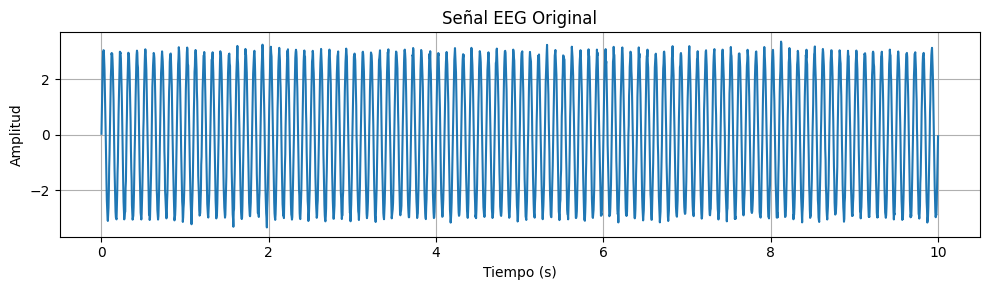

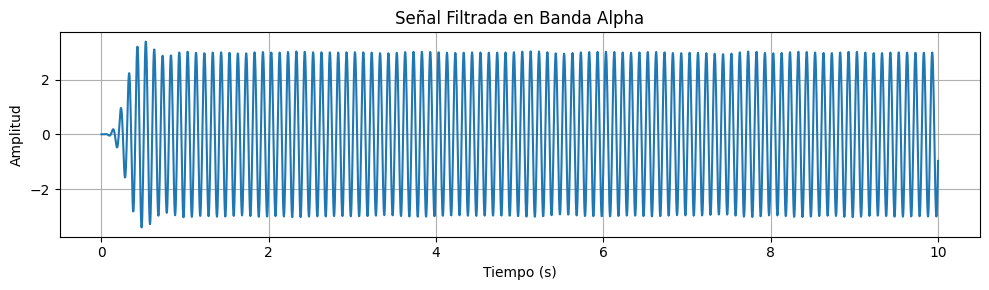

Potencia Alpha estimada: 1.083


In [119]:
if __name__ == "__main__":
    main()